In [1]:
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

In [2]:
# remove all saved images in the current directory
for file in os.listdir():
    if file.endswith('.png'):
        os.remove(file)
# remove all saved images in the directory TestCase2
try:
    for file in os.listdir('./TestCase2/'):
        if file.endswith('.png'):
            os.remove('./TestCase2/' + file)
except:
    pass

### Plot Functions

In [3]:
def plots2D(Z, title = 'plot', vmin=None, vmax=None):
    N = Z.shape[0]
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y)
    
    plt.figure(figsize=(12, 6))
    im = plt.imshow(Z, cmap='jet', origin='lower', vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.set_label('Function Value')

    plt.tight_layout()
    plt.savefig( './TestCase2/' + title + '.png')  # Save as PNG
    plt.show()

In [4]:
def plots2Dcontour(Z, title = 'plot', vmin=None, vmax=None, colormap='jet'):
    N = Z.shape[0]
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y)
    
    plt.figure(figsize=(8*1.2, 6*1.2))
    cp = plt.contourf(X, Y, Z, cmap=colormap, vmin=vmin, vmax=vmax)
    plt.colorbar(cp)  # Add a colorbar
    plt.savefig( './TestCase2/' + title + '.png')  # Save as PNG
    plt.show()

### No exact solution, import and interpolate femR solution

In [5]:
# copy file fdaPDE_SUPG_sol.txt from the build directory of femR to the current directory with shutil
try:
    os.makedirs('TestCase2')
except:
    pass
fdaPDE_SUPG_sol  = '../../../fdaPDE-core/test/build/fdaPDE_SUPG_sol.txt'
shutil.copy(fdaPDE_SUPG_sol, './TestCase2/fdaPDE_SUPG_sol.txt')


'./TestCase2/fdaPDE_SUPG_sol.txt'

4225
N =  65


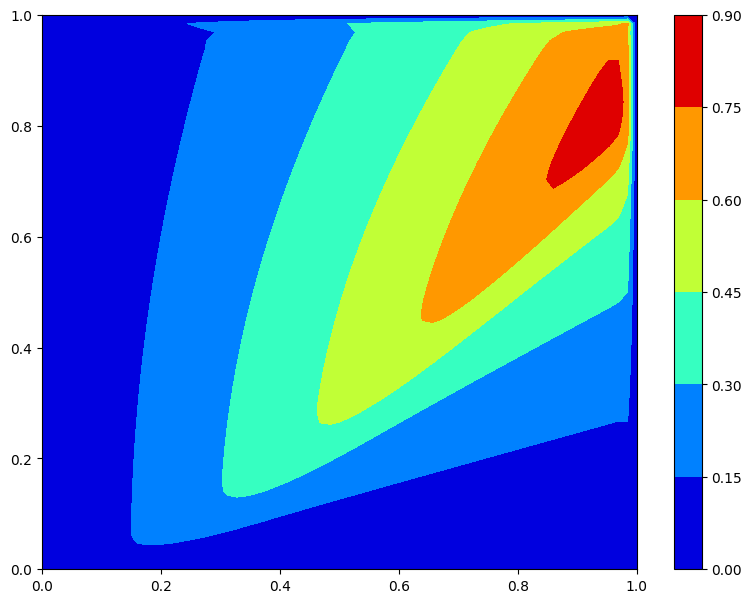

(65, 65)


In [6]:
# reshape and visualize solution
path = 'TestCase2/fdaPDE_SUPG_sol.txt'
# path = 'TestCase2/fdaPDE_SUPG_sol_no_stab.txt'
data = np.loadtxt(path, delimiter=',')
print(data.size)
N = int(np.sqrt(data.size))
print("N = ", N)
data = data.reshape(N,N)
# plots2D(data, 'TestCase2_sol')
plots2Dcontour(data, 'TestCase2_sol_contour')
print(data.shape)

### Delete previous observations, locations and expected

In [7]:
# delete a directory and all its content
shutil.rmtree('../data/transport/TransportTestCase2')
# recreate the directory empty
os.makedirs('../data/transport/TransportTestCase2')

### Create observations and locations

In [8]:
from scipy.interpolate import RegularGridInterpolator
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
interpolating_function = RegularGridInterpolator((x, y), data, method='linear')

In [18]:
# create locations for Psi test
n = 4
t = np.linspace(0, 1, n)
x, y = np.meshgrid(t, t)
locs = np.array([x.flatten(), y.flatten()]).T

# save flattened locations with 6 digits precision
np.savetxt('../data/transport/testPsi/locs.txt', locs.flatten(), delimiter=',', fmt='%.6f')

row_indices = np.arange(1, n*n + 1)
locs = np.column_stack((row_indices, locs))
column_names = np.array(['', 'V1', 'V2'])
locs = np.vstack((column_names, locs))

np.savetxt('../data/transport/testPsi/locs.csv', locs, delimiter=',', fmt='%s')
locs

array([['', 'V1', 'V2'],
       ['1.0', '0.0', '0.0'],
       ['2.0', '0.3333333333333333', '0.0'],
       ['3.0', '0.6666666666666666', '0.0'],
       ['4.0', '1.0', '0.0'],
       ['5.0', '0.0', '0.3333333333333333'],
       ['6.0', '0.3333333333333333', '0.3333333333333333'],
       ['7.0', '0.6666666666666666', '0.3333333333333333'],
       ['8.0', '1.0', '0.3333333333333333'],
       ['9.0', '0.0', '0.6666666666666666'],
       ['10.0', '0.3333333333333333', '0.6666666666666666'],
       ['11.0', '0.6666666666666666', '0.6666666666666666'],
       ['12.0', '1.0', '0.6666666666666666'],
       ['13.0', '0.0', '1.0'],
       ['14.0', '0.3333333333333333', '1.0'],
       ['15.0', '0.6666666666666666', '1.0'],
       ['16.0', '1.0', '1.0']], dtype='<U32')

In [7]:
n = 6
while n <= 14:
    t = np.linspace(0, 1, n)
    x, y = np.meshgrid(t, t)
    # ATTENZIONE ALL'ORDINAMENTO !!
    # locs = np.array([x.flatten(), y.flatten()]).T # row major ordering
    locs = np.array([y.flatten(), x.flatten()]).T # column major ordering
    
    observations = interpolating_function(locs) #locs[:,0], locs[:,1])
    row_indices = np.arange(1, n*n + 1)
    result_matrix = np.column_stack((row_indices, observations))
    column_names = np.array(['', 'x'])
    result_matrix = np.vstack((column_names, result_matrix))
    np.savetxt('../data/transport/TransportTestCase2/observations' + str(n) + '.csv', result_matrix, delimiter=',', fmt='%s')
    
    locs = np.column_stack((row_indices, locs))
    column_names = np.array(['', 'V1', 'V2'])
    locs = np.vstack((column_names, locs))
    np.savetxt('../data/transport/TransportTestCase2/locs' + str(n) + '.csv', locs, delimiter=',', fmt='%s')
    n += 2

NameError: name 'interpolating_function' is not defined

Visualize the interpolated observations to assure they're not transposed

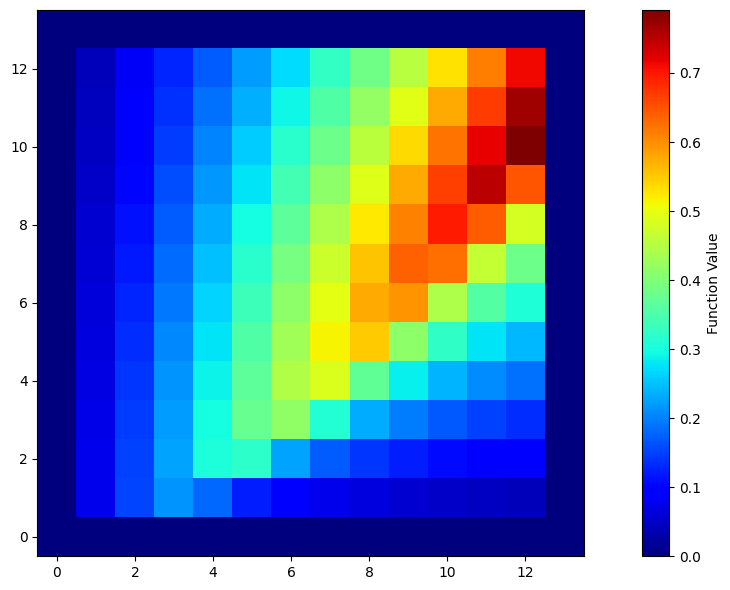

In [10]:
plots2D(observations.reshape(14,14))

### Save $\texttt{expected()}\equiv\texttt{femR}$ solution

In [11]:
expected = np.copy(data)
N = expected.size
row_indices = np.arange(1, N + 1)
expected = np.column_stack((row_indices, expected.flatten())) # row major ordering
column_names = np.array(['', 'x'])
expected = np.vstack((column_names, expected ))
np.savetxt('../data/transport/TransportTestCase2/expected.csv', expected, delimiter=',', fmt='%s')

Now run TestCase2

### Plot $\texttt{model.f()}$

In [12]:
# delete previous model.f()s
try:
    shutil.rmtree('./TestCase2/modelf/')
except:
    pass
os.makedirs('TestCase2/modelf/')
# copy all the files starting with 'modelf' from the build directory
for file in os.listdir('../build/'):
    if file.startswith('modelf'):
        shutil.copy('../build/' + file, './TestCase2/modelf/' + file)

average model.f()


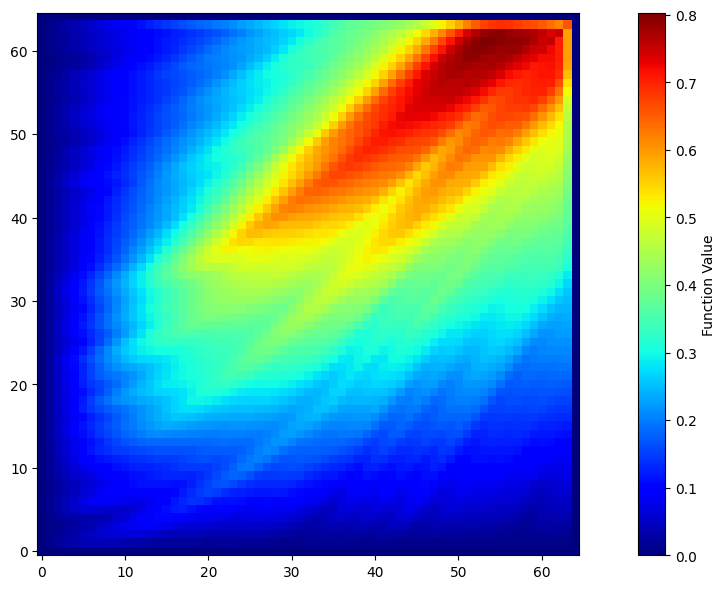

In [14]:
path  = './TestCase2/modelf/'
average_modelf = 0
n = 6
while n <= 14:
    modelf = np.loadtxt(path + 'modelf' + str(n) + '.txt', delimiter=',')
    N = int(np.sqrt(modelf.size))
    modelf = modelf.reshape(N,N)
    average_modelf += modelf
    # plots2D(modelf, 'TestCase1_modelf' + str(n))
    n += 2
average_modelf /= 5
print('average model.f()')
plots2D(average_modelf, 'TestCase2_modelf_average')

Plot all the model.f()s in a subplot

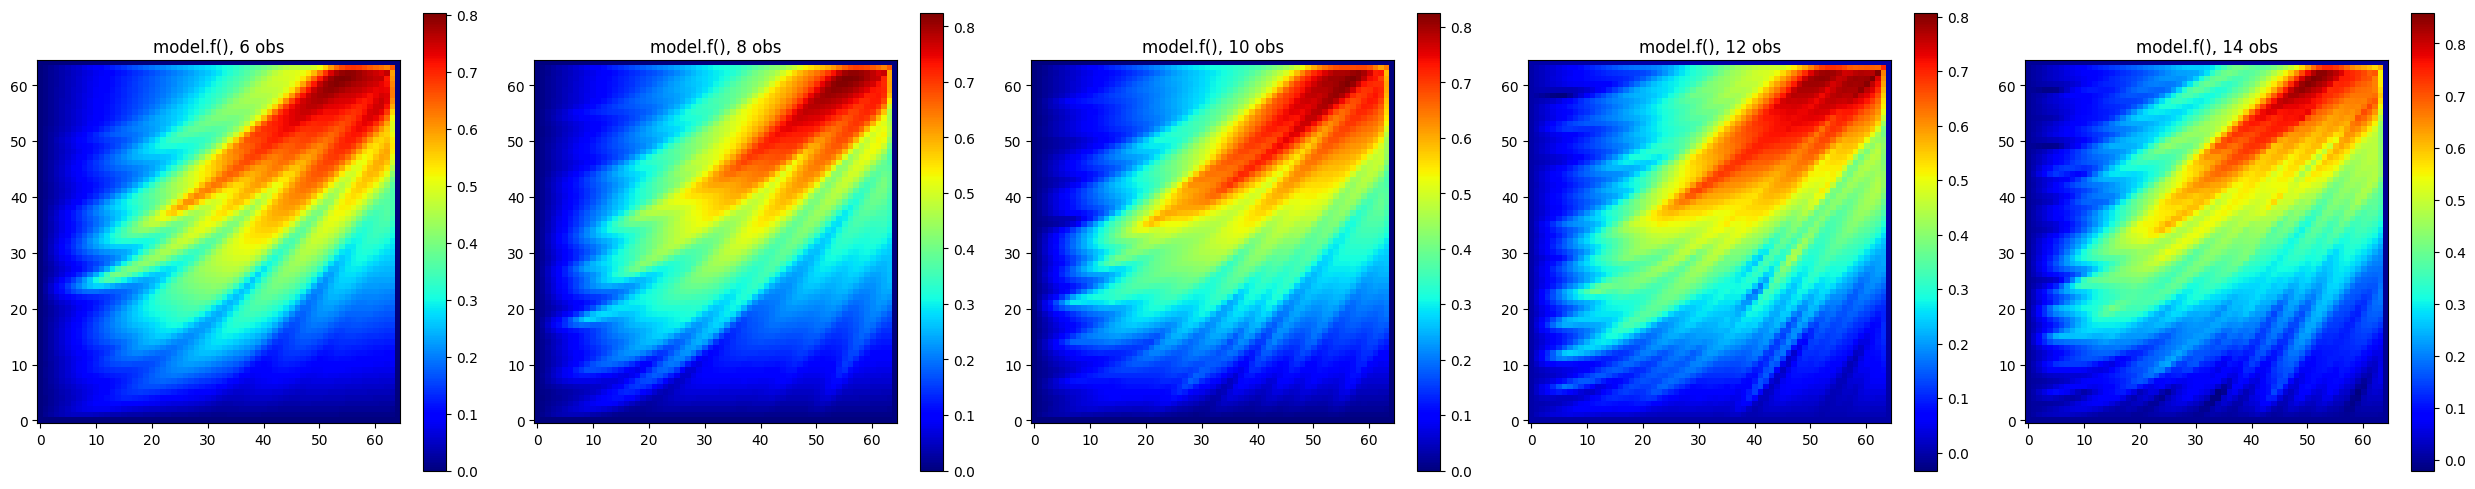

In [15]:
# print the five model_f()s in a subplot
plt.figure(figsize=(25, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    modelf = np.loadtxt(path + 'modelf' + str(2*(i+3)) + '.txt', delimiter=',')
    N = int(np.sqrt(modelf.size))
    modelf = modelf.reshape(N,N)
    plt.imshow(modelf, cmap='jet', origin='lower')
    plt.title('model.f(), ' + str(2*(i+3)) + ' obs')
    plt.colorbar()
plt.tight_layout()
plt.savefig('./TestCase2/model_f_subplot.png')
plt.show()

In [ ]:
plots2Dcontour(average_modelf, 'TestCase1_modelf_average_contour')

### Error between $\texttt{model.f()}$ and $\texttt{femR}$

norm2 =  5.393978505262348
norm_inf =  7.004710950420149


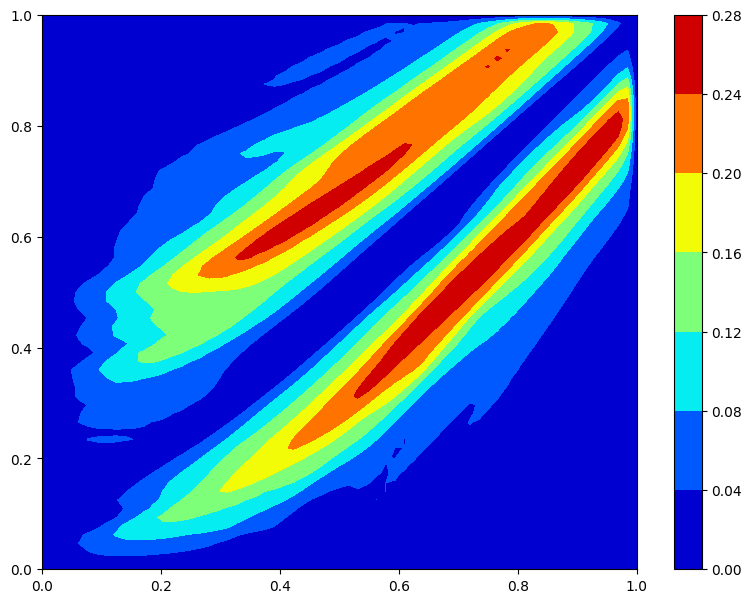

In [16]:
# compute error between model.f() and data
modelf = np.copy(average_modelf)
error = np.abs(modelf - data)
norm_error_2 = np.linalg.norm(error, 2)
norm_error_inf = np.linalg.norm(error, np.inf)
print("norm2 = ", norm_error_2)
print("norm_inf = ", norm_error_inf)
# plots2D(error, 'TestCase2_error') # , vmin=0, vmax=0.012)
plots2Dcontour(error, 'TestCase2_error_contour')

norm2 =  4.175593009828785
norm_inf =  6.009462461372462
norm2 =  5.480184671952208
norm_inf =  7.56901163014985
norm2 =  5.376781991285496
norm_inf =  7.319703434116363
norm2 =  6.117866160973361
norm_inf =  7.6735205298473685
norm2 =  6.459422194425559
norm_inf =  8.083301449636348


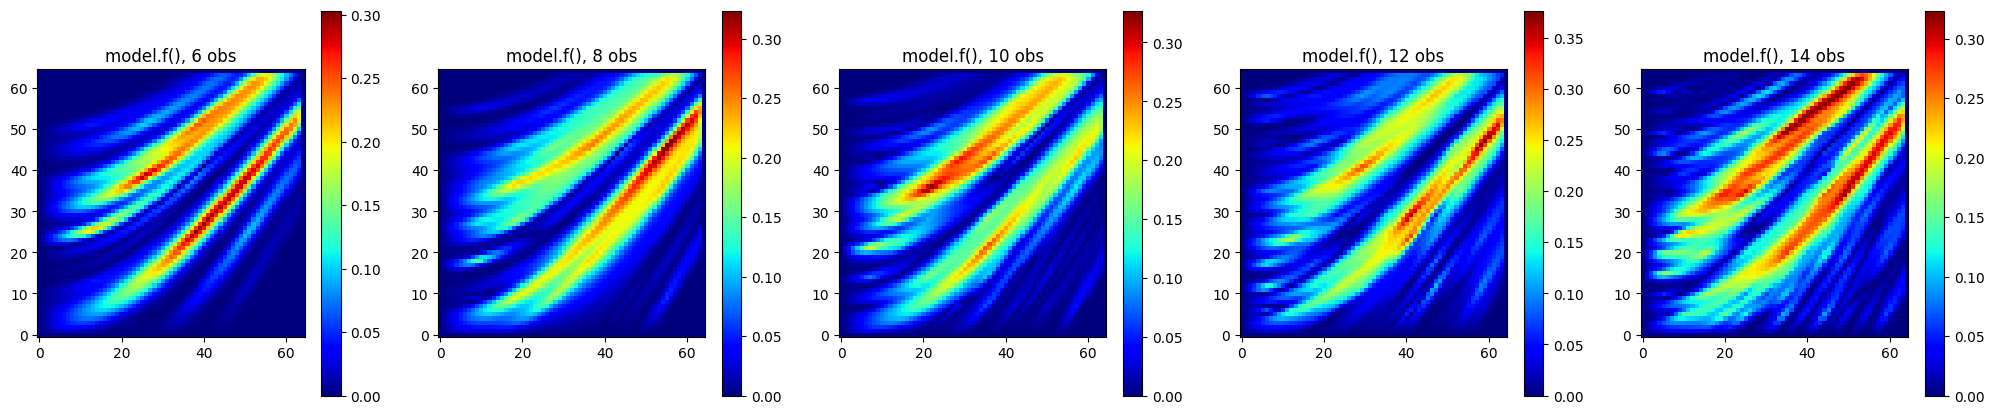

In [17]:
# plot the error of the five model_f()s in a subplot
plt.figure(figsize=(25, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    modelf = np.loadtxt(path + 'modelf' + str(2*(i+3)) + '.txt', delimiter=',')
    N = int(np.sqrt(modelf.size))
    modelf = modelf.reshape(N,N)
    error = np.abs(modelf - data)
    norm_error_2 = np.linalg.norm(error, 2)
    norm_error_inf = np.linalg.norm(error, np.inf)
    print("norm2 = ", norm_error_2)
    print("norm_inf = ", norm_error_inf)
    plt.imshow(error, cmap='jet', origin='lower')
    plt.title('model.f(), ' + str(2*(i+3)) + ' obs')
    plt.colorbar()

Sembra che all'aumentare del numero di osservazioni, il problema diventi ancor più a trasporto dominante.

### Boxplots

In [18]:
directory_testcase = './TestCase2/'
directory_build = '../build/'
try:
    shutil.rmtree(directory_testcase + 'RMSEs/')
except:
    pass
# recreate emtpy directory
os.makedirs(directory_testcase + 'RMSEs/')
# copy all RMSES_xx.csv files
for file in os.listdir(directory_build):
    if file.endswith('.csv'):
        shutil.copy(directory_build + file, directory_testcase + 'RMSEs/') 

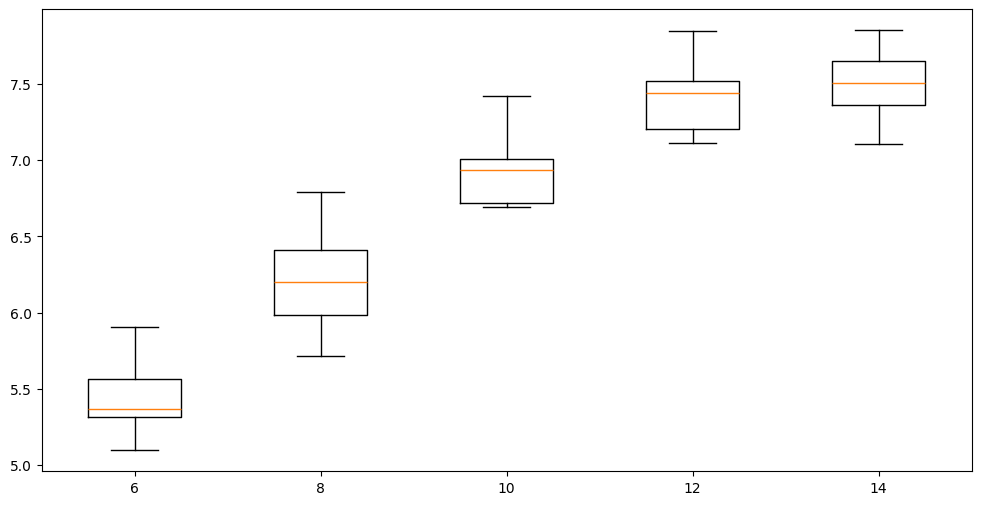

In [19]:
data_boxplot = {}
i = 6
while i <= 14:
    current = np.loadtxt(directory_testcase + 'RMSEs/RMSE_' + str(i) + '.csv')
    data_boxplot[i] = current
    i += 2

plt.figure(figsize=(12, 6))
plt.boxplot(data_boxplot.values())
plt.xticks(range(1, len(data_boxplot.keys()) + 1), data_boxplot.keys())
plt.savefig('./TestCase2/TestCase2_boxplots.png')
plt.show()